In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

# Initial Data and KMeans Exploration

In [3]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [4]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [5]:
k=2

In [6]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [7]:
clustered_data_sklearn

KMeans(n_clusters=2, n_init=10)

In [8]:
clustered_data_sklearn.cluster_centers_.shape[0]

2

In [9]:
clustered_data_sklearn.inertia_

1127.6180114587285

In [10]:
df.shape[0]

614

In [11]:
c1 = np.array([clustered_data_sklearn.cluster_centers_[0],]*df.shape[0])

In [12]:
c2 = np.array([clustered_data_sklearn.cluster_centers_[1],]*df.shape[0])

In [13]:
clustered_data_sklearn.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [14]:
np.sqrt(np.sum(np.square(df.to_numpy() - c2)))

40.33128699441412

In [15]:
def my_inertia(df, clustered_data_sklearn):
    """Calculate Inertia"""
    
    centres = clustered_data_sklearn.cluster_centers_
    
    inertia = 0
    row_num = 0
    
    for row in list(df.iterrows()):
        centre_idx = clustered_data_sklearn.labels_[row_num]
        inertia += np.sum(np.square(np.array(row[1]) - clustered_data_sklearn.cluster_centers_[centre_idx]))
        row_num += 1
        
    return inertia

In [16]:
inertia = my_inertia(df, clustered_data_sklearn)

In [17]:
# Confirm calculation of SSE or "Inertia" is correct :)

In [18]:
inertia, clustered_data_sklearn.inertia_

(1127.6180114587291, 1127.6180114587285)

# KMeans SSE/Inertia & Elbow Method

In [58]:
ks = [1,2,3,4,5,6,7,8,9]


def elbow_method(ks, df):
    """Calculate inertiae for different values of k."""
    inertiae = []
    
    for k in ks:
        kmeans = cluster.KMeans(n_clusters=k, random_state=100, n_init=10, max_iter=300)
        kmeans.fit(df)
        inertiae.append(my_inertia(df, kmeans))
    
    return inertiae


def determine_best_k(inertiae):
    """Determine the point with the greatest rate of change"""
    d1 = np.diff(inertiae)
    d2 = np.diff(d1)
    d2 = list(d2)
    print(d2)
    return(d2.index(max(d2)) + 2)

def plot_elbow(ks, inertiae, best_k):
    """Plot the elbow!"""
    plt.plot(ks, inertiae, 'bo-')
    plt.xlabel('k')
    plt.ylabel('Inertia/SSD')
    plt.title('Elbow Method')
    plt.vlines(best_k, ymin=min(inertiae), ymax=max(inertiae), linestyles='solid')
    plt.show()

# print("Optimal number of clusters:", Optimal_k)

In [59]:
inertiae = elbow_method(ks, df)

In [60]:
best_k = determine_best_k(inertiae)

[67.59273485383062, 29.9634091480317, 24.47722223515302, 13.841648457490805, 14.242303968128908, 12.847281532739657, -0.045222479855510755]


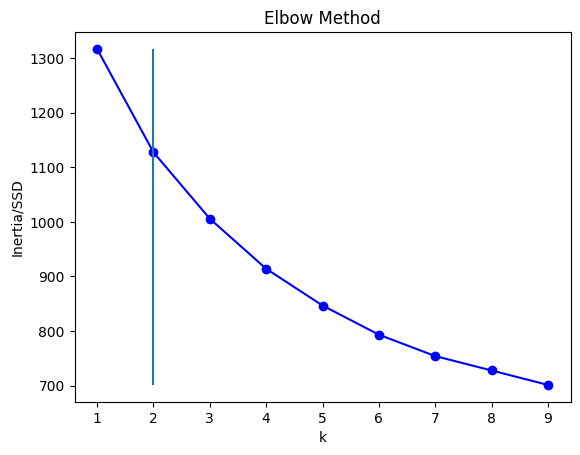

In [61]:
plot_elbow(ks, inertiae, best_k)

# KMeans Silhouette Method

Number of clusters 2 Silhouette score 0.15345667241994654
Number of clusters 3 Silhouette score 0.15551634932637773
Number of clusters 4 Silhouette score 0.15520273853358452
Number of clusters 5 Silhouette score 0.15877255636950405
Number of clusters 6 Silhouette score 0.16316001236794012
Number of clusters 7 Silhouette score 0.15598474592202866
Number of clusters 8 Silhouette score 0.17089692181504773
Number of clusters 9 Silhouette score 0.1670387473926629


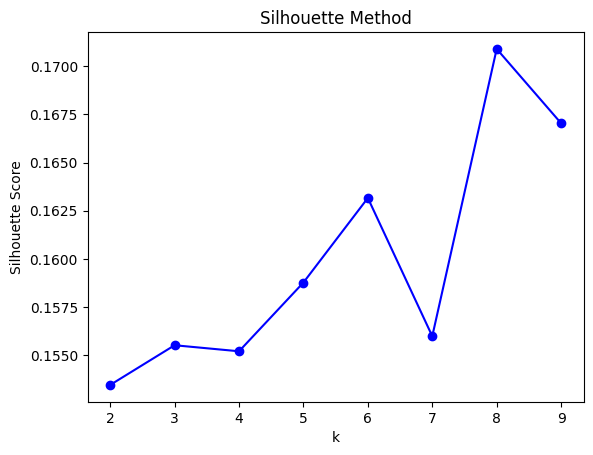

In [23]:
from sklearn.metrics import silhouette_score 

ks = [2,3,4,5,6,7,8,9]

score = []
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(data)
    score.append(silhouette_score(data, kmeans.labels_))
    print("Number of clusters", k, "Silhouette score", silhouette_score(data, kmeans.labels_))
    
# Plot the sum of squared distances against k
plt.plot(ks, score, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [45]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%len(colors)],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [46]:
k=2

In [54]:
best_kmeans = cluster.KMeans(n_clusters=2, random_state=100, n_init=10, max_iter=300)
results = best_kmeans.fit_transform(df)

In [55]:
data_and_centers = np.r_[df.to_numpy(),best_kmeans.cluster_centers_]

In [56]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

c:\users\gmahon1\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


# Plotting Data with Multidimensional Scaling

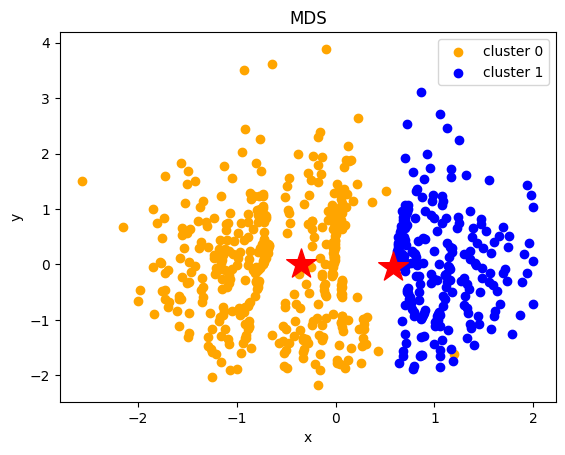

In [57]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# Plotting Data with t-SNE

In [30]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


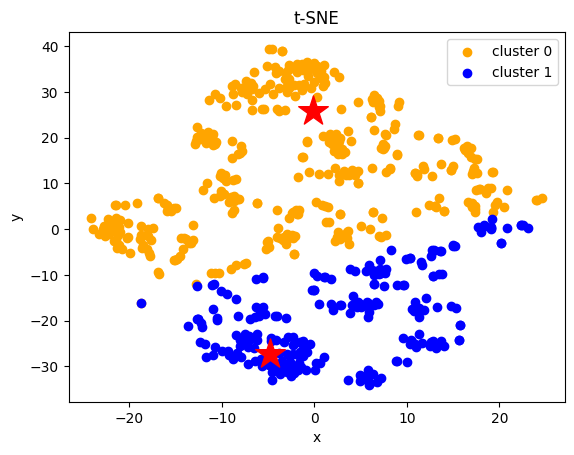

In [31]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

# Using Principal Component Analysis

In [32]:
from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
data = pca.fit_transform(df)
 

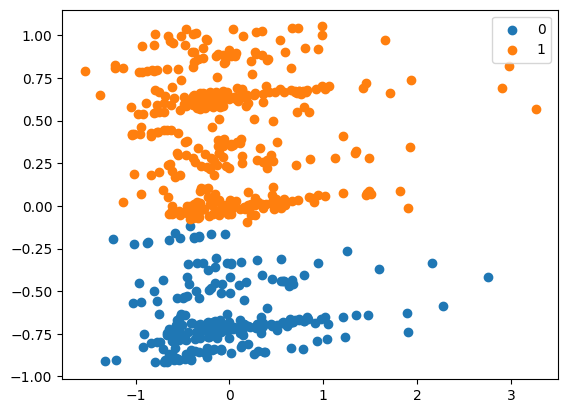

In [33]:
#predict the labels of clusters.

kmeans = cluster.KMeans(n_clusters=2, random_state=100, n_init=10)
label = kmeans.fit_predict(data)
 
#Getting unique labels
labels = np.unique(label)
 
#plotting the results:
for i in labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()